In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0
Num GPUs Available:  2


In [6]:
train_path = '/kaggle/input/datasets/puneet6060/intel-image-classification/seg_train/seg_train/'
test_path = '/kaggle/input/datasets/puneet6060/intel-image-classification/seg_test/seg_test/'

# Load Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(150, 150),
    batch_size=32,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(150, 150),
    batch_size=32,
    label_mode='int'
)

class_names = train_ds.class_names
print("Correct Classes found:", class_names)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Correct Classes found: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


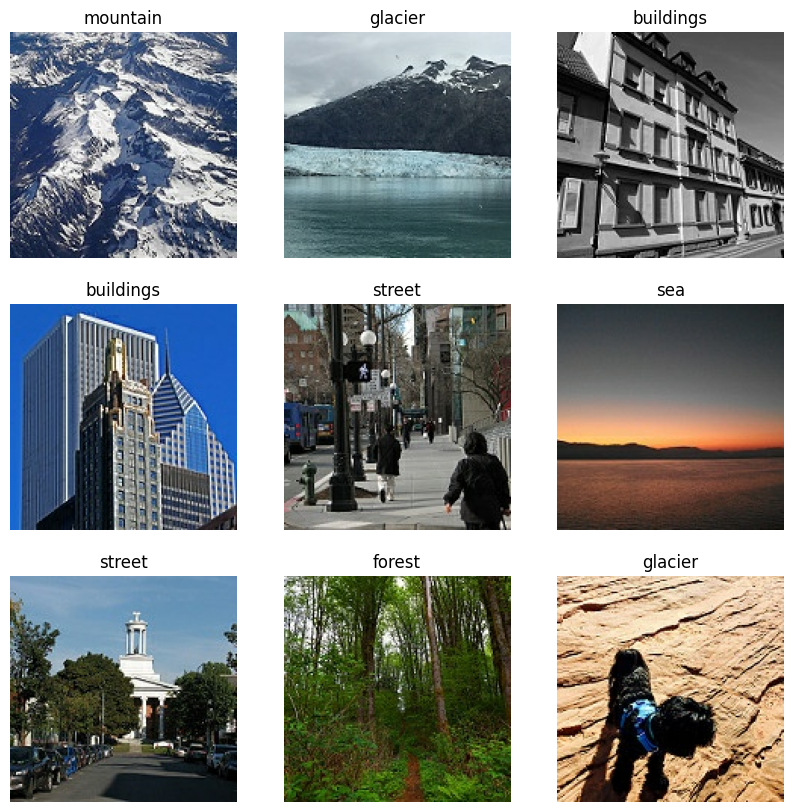

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
model_scratch = models.Sequential([

    layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(6, activation='softmax')
])

model_scratch.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_scratch.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Starting training for the Scratch Model...")

history_scratch = model_scratch.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Starting training for the Scratch Model...
Epoch 1/10


I0000 00:00:1771289268.890846     123 service.cc:152] XLA service 0x7a1d28006e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771289268.890885     123 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771289268.890889     123 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771289269.262121     123 cuda_dnn.cc:529] Loaded cuDNN version 91002


  6/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.2122 - loss: 1.9571

I0000 00:00:1771289273.228774     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.5070 - loss: 1.2268 - val_accuracy: 0.7180 - val_loss: 0.7589
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7028 - loss: 0.7932 - val_accuracy: 0.7697 - val_loss: 0.6354
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7597 - loss: 0.6658 - val_accuracy: 0.8177 - val_loss: 0.5291
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7957 - loss: 0.5658 - val_accuracy: 0.8023 - val_loss: 0.5706
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8284 - loss: 0.4826 - val_accuracy: 0.8273 - val_loss: 0.5127
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8527 - loss: 0.4058 - val_accuracy: 0.8163 - val_loss: 0.5409
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8812 - loss: 0.3273 - val_accuracy: 0.8153 - val_loss: 0.5835
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8973 - loss: 0.2866 - val_accurac

In [10]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150, 150, 3),
    include_top=False, 
    weights='imagenet'
)

base_model.trainable = False

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax') 
])

model_transfer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_transfer.summary()

/tmp/ipykernel_55/3037408787.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
print("Starting training for the Transfer Learning Model...")

history_transfer = model_transfer.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5 
)

Starting training for the Transfer Learning Model...
Epoch 1/5


2026-02-17 00:51:08.106468: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-17 00:51:08.243578: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


435/439 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6231 - loss: 0.9744

2026-02-17 00:51:24.353220: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-17 00:51:24.497597: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-17 00:51:24.634711: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6237 - loss: 0.9729

2026-02-17 00:51:39.461714: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-17 00:51:39.598587: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


439/439 ━━━━━━━━━━━━━━━━━━━━ 46s 70ms/step - accuracy: 0.6238 - loss: 0.9726 - val_accuracy: 0.7557 - val_loss: 0.6445
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7522 - loss: 0.6510 - val_accuracy: 0.7667 - val_loss: 0.6222
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7715 - loss: 0.5976 - val_accuracy: 0.7807 - val_loss: 0.6012
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7895 - loss: 0.5578 - val_accuracy: 0.7643 - val_loss: 0.6329
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7973 - loss: 0.5296 - val_accuracy: 0.7833 - val_loss: 0.5916


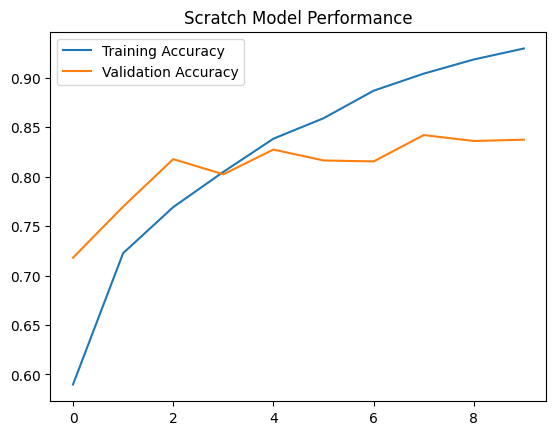

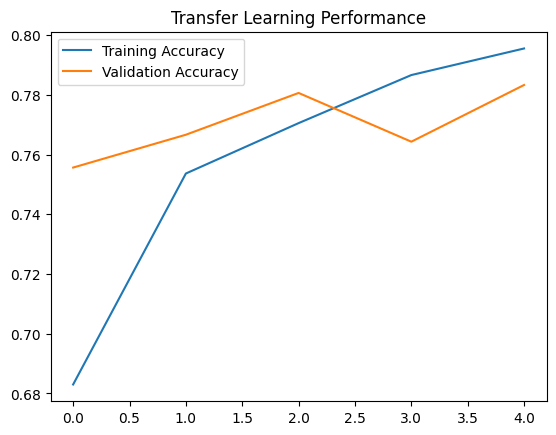

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(len(acc))

    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot both
plot_history(history_scratch, "Scratch Model Performance")
plot_history(history_transfer, "Transfer Learning Performance")